In [1]:
# Please install julia and Korg
# https://ajwheeler.github.io/Korg.jl/stable/install/

In [ ]:
# Korg takes sometime when you run first time as it needs to precompile codes (that is my understanding)

In [2]:
from juliacall import Main as jl
jl.seval("using Korg")
Korg = jl.Korg

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [19]:
import matplotlib.pyplot as plt
import time
import pandas
import numpy as np

In [4]:
lines = Korg.get_VALD_solar_linelist()

In [14]:
metal_poor_A_X = Korg.format_A_X(-2.0) 
metal_poor_atm = Korg.interpolate_marcs(5100, 2.1, metal_poor_A_X)
# This part is slow when you run this cell for the first time after you open this notebook
# It becomes extremely fast from the second run even if you change parameters

In [15]:
# This is to construct an abundance input
# It means [Fe/H] = -2.0, and A(Li) = 2.0 ([Li/H] = 2.0 if solar_relative=True)
li_rich = Korg.format_A_X(-2.0,{"Li":2.0},solar_relative=False)
spec_lirich = Korg.synthesize(metal_poor_atm,lines,li_rich,6705,6715)
li_poor = Korg.format_A_X(-2.0,{"Li":0.0},solar_relative=False)
spec_lipoor = Korg.synthesize(metal_poor_atm,lines,li_poor,6705,6715)
# The difference between Korg.synthesize and Korg.synth is that synthesize allows more control

In [16]:
# We can apply a smoothing like this
flux_lipoor = Korg.apply_LSF(spec_lipoor.flux.to_numpy()/spec_lipoor.cntm.to_numpy(),
                             spec_lipoor.wavelengths,20000)

flux_lirich = Korg.apply_LSF(spec_lirich.flux.to_numpy()/spec_lirich.cntm.to_numpy(),
                             spec_lirich.wavelengths,20000)

(0.0, 1.1)

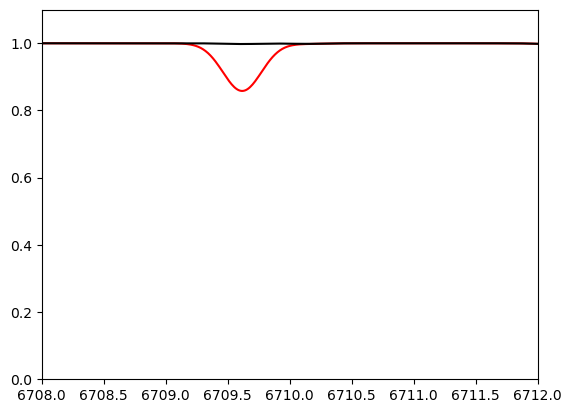

In [17]:
plt.plot(spec_lirich.wavelengths.to_numpy(),\
         flux_lirich,'r-')
plt.plot(spec_lipoor.wavelengths.to_numpy(),\
         flux_lipoor,'k-')
plt.xlim(6708,6712)
plt.ylim(0.0,1.1)

In [18]:
def Korglinelist2pandasdf(lines):
    '''
    This function converts Korg's linelist object to pandas dataframe
    '''
    lines_list = [(line.wl*1.0e8,str(line.species),line.E_lower,line.log_gf,line.vdW[0],line.vdW[1],line.gamma_rad,line.gamma_stark) \
         for line in lines.to_numpy()]
    return pandas.DataFrame(lines_list, columns=["wavelength","species","expot","loggf","vdW1","vdw2","gamma_rad","gamma_stark"])

In [20]:
Korglinelist2pandasdf(lines).to_csv("./linelist.csv",index=None)